In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore") 

# Machine learning libraries
from sklearn.model_selection import train_test_split
# split test and train data
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
# K Fold cross validation 
from sklearn import metrics
# metrics will be use later to get a accuracy score 

# Prediction algoritms that I will use in this study 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Introduction 

 Breast cancer is cancer that forms in the cells of the breasts.

 After skin cancer, breast cancer is the most common cancer diagnosed in women in the United States. Breast cancer can occur in both men and women, but it's far more common in women.Substantial support for breast cancer awareness and research funding has helped created advances in the diagnosis and treatment of breast cancer. 

Breast cancer survival rates have increased, and the number of deaths associated with this disease is steadily declining, largely due to factors such as earlier detection, a new personalized approach to treatment and a better understanding of the disease.

In this study you'll get a csv file called 'breast-cancer-wisconsin-data'.From there you will get informations about diagnosis and specific data in numeric value.Our goal of this study is prediction of the breast cancer whether they have **benign or malignant** by using factor columns 


Additionally I used some resources for my sutdy
- https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
- https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

# Data Wrangling

## 1. Gathering  

In [ ]:
# load csv file
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

## 2. Assessing & Cleaning  

In [ ]:
df.head()
# load 5 rows of df 
# There are a few unnecessary columns

In [ ]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
#In this study 'id' and 'Unnamed: 32' are not needed 
#So drop both columns 

In [ ]:
df.isna().sum()
# checking missing value 
# No missing values

In [ ]:
df.info()
# get a information about each column

In [ ]:
df.shape
# rows and columns

In [ ]:
df.columns
# all columns in df 

> We have total 31 columns which consist of 1 categorical and 30 quantitative values. 
So we gonna use `diagonisis` for final result.That means using different kind of cancer factors(30 quantitative values) we will get `diagonisis` prediction. 

Of course that's really good if we use all factor columns to guess who has probably have a different type of `diagnosis`.But it takes a lot of time. Also it's really **hard to read at a glance**.So what we`re going to do now is copy the original file and filter columns that I want to use. 

**Notice**
- Copying the file is also important process.Because keeping the original file is more easiler when you use that file again later. 

**Columns information**
- mean : average
- se(standard error) : quantifies the variation in the means from multiple sets of measurements.In other words standard error is the mean of standard deviation.
- standard deviation : quantifies the variation within a set of measurements 
- worst : worst or largest mean value from each data

The confusing things between **standard error** and **standard deviation** is that the standard error can be estimated from a single set of measurements, even though it describes the means from multiple sets. Thus,even if you only have a singel set of measurements, you are often given the option to plot the standard error. 

## What is/are the main feature(s) of interest in your dataset?
- diagnosis 

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- all the other columns  

## Unnecessary featues in the dataset do you think
- Nothings, we will use all columns for factors of breast cancer 

# Data Visualization 

### 1. Univariate Exploration of data

Using only one variable to visualize **df_new table**

In [ ]:
#countplot
plt.subplots(figsize=(10,5))
sns.countplot(data=df,x='diagnosis');

plt.title('Diagnosis counting'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Type of diagonosis'.title(),
          fontsize=14,weight="bold")

plt.ylabel('Count'.title(),
           fontsize=14,weight="bold")

plt.legend(['malignant','benign'],loc='center right',bbox_to_anchor=(1.2, 0.93), 
           title="Diagonisis", title_fontsize = 14);

#### Observation 

> There are a lot more benign than malignant.So we called `inbalanced data`.This is actually not a extreme case. If it`s too strong.We should have a balance between two type of diagnosis in order to get a right prediction later.

In [ ]:
#pie chart  

plt.figure(figsize=(15,7))
sorted_counts = df['diagnosis'].value_counts()
# count the value of diagnosis 
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');


plt.title('Proprotion of malignant and benign'.title(),
         fontsize = 14, weight="bold");

plt.legend(['Benign(B)','Malignant(M)'],bbox_to_anchor=(1,0.9));

#### Observation

> As you can see on the pie chart benign possesses 63% of the total dataset.

In [ ]:
#distplot = histogram + curveline 
# for example : radius mean

plt.subplots(figsize=(15,7))
x = df.radius_mean
bins = np.arange(0,30,1)
sns.distplot(x,bins=bins,color='black')

#ax.set_yticklabels([], minor = True);


plt.title('radius mean Histogram'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('radius mean range'.title(),
          fontsize=14,weight="bold")

plt.ylabel('Count in percentage'.title(),
           fontsize=14,weight="bold");

#### Observation

> Approximately normal distributed graph

### 2.Bivariate Exploration of Data

Using only one variable to visualize `df_new` table. We will use `violinplot`,`pointplot`

In [ ]:
# split table into different valriables 
y=df.diagnosis 
x = df.iloc[:,1:] 

# standardization
stand = (x - x.mean()) / (x.std())             

> Why we're doing standardization? because columns with `mean`,`se` and `worst` have different size of value.So it's hard to compare with raw data.That's why we're doing standardization to make it comparable.


## $$ z_{score} = \frac {(x- \mu)}{\sigma}$$

###### This is also we called `Standard Scaler` 

The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. If data is not normally distributed, this is not the best Scaler to use.


- Z = standard score or z score , this score tells us you how many standard deviations from the mean your score is.
- x = observed value
- $\mu$ = mean value of dataset
- $\sigma$ = standard deviation of dataset

In [ ]:
# Because we have 30 sub features we'll divide 3 groups to visualize

data = pd.concat([y,stand.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

# In order to visualize different type of numeric value in one graph.We're going to melt df_new table into the new table called `data`.
# id_var : Column(s) to use as identifier variables.
# var_name : Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.
# value_name : Name to use for the ‘value’ column. 


plt.figure(figsize=(15,7))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")


plt.title('Sub features with standardization (first 10 features with violinplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");

plt.xticks(rotation=45);


In [ ]:
data = pd.concat([y,stand.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

# In order to visualize different type of numeric value in one graph.We're going to melt df_new table into the new table called `data`.
# id_var : Column(s) to use as identifier variables.
# var_name : Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.
# value_name : Name to use for the ‘value’ column. 


plt.figure(figsize=(15,7))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")


plt.title('Sub features with standardization (Second 10 features with violinplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");
plt.xticks(rotation=45);


In [ ]:
data = pd.concat([y,stand.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

# In order to visualize different type of numeric value in one graph.We're going to melt df_new table into the new table called `data`.
# id_var : Column(s) to use as identifier variables.
# var_name : Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.
# value_name : Name to use for the ‘value’ column. 


plt.figure(figsize=(15,7))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")


plt.title('Sub features with standardization (last 10 features with violinplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");

plt.xticks(rotation=45);


#### Observation 

> Violinplot tells us the distribution of z-score with different type of tumors

In [ ]:
data = pd.concat([y,stand.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.subplots(figsize=(15,7))
base_color = sns.color_palette()[6]
sns.pointplot(data=data,x='features',y='value',hue='diagnosis',dodge=True,ci=30,
              color=base_color)
# dodge: amount to separate the points for each level of the hue variable along the categorical axis.


plt.title('Sub features with standardization (first 10 features with pointplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");

plt.xticks(rotation=45);


In [ ]:
data = pd.concat([y,stand.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.subplots(figsize=(15,7))
base_color = sns.color_palette()[6]
sns.pointplot(data=data,x='features',y='value',hue='diagnosis',dodge=True,ci=30,
              color=base_color)
# dodge: amount to separate the points for each level of the hue variable along the categorical axis.


plt.title('Sub features with standardization (Second 10 features with pointplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");

plt.xticks(rotation=45);


In [ ]:
data = pd.concat([y,stand.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.subplots(figsize=(15,7))
base_color = sns.color_palette()[6]
sns.pointplot(data=data,x='features',y='value',hue='diagnosis',dodge=True,ci=30,
              color=base_color)
# dodge: amount to separate the points for each level of the hue variable along the categorical axis.


plt.title('Sub features with standardization (last 10 features with pointplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");

plt.xticks(rotation=45);


#### Observation 

> Pointplot tells us  the distribution of z-score with different type of tumors

### 3.Multivariate Exploration of Data

> Using more than two variables to visualize data_new table which is standardized form of df table. We will use `Scatterplot`

In [ ]:
data_new = pd.concat([y,stand],axis=1)
# build a new dataset with y and stand
# if you forgot what y and stand are. Just look at below 

# y=df.diagnosis 
# x = df.iloc[:,1:]  and stand = (x - x.mean()) / (x.std())          

In [ ]:
# scatterplot with 2 high related sub features. Addtionally diagnosis will be used as a hue of different type of tumors
# Before we're going to plot scatter we'll find out which sub features are related together strongly 
# For that we will use pearson corrla

plt.figure(figsize=(28,13))
c= data_new.corr()
mask = np.triu(np.ones_like(c, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
# color choose
sns.heatmap(c,cmap=cmap,mask=mask,center=0,annot=True);


plt.title('Sub title correlation'.title(),
         fontsize=20,weight='bold');

#### Observation

> So I will pick following combination, which tell us one of the positively and negatively heighest corrleation 

**Positive correlation**
- radius_worst & perimeter_mean 
- area_mean & radius_mean
**Negative correlation**
- fractal_dimension_mean & radius_mean
- fractal_dimension_mean & area_mean 

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,7))

sns.scatterplot(data=data_new,x='radius_worst',y='perimeter_mean',hue='diagnosis',x_jitter=0.04,ax=ax[0])
ax[0].set_title('radius_worst vs perimeter_mean')
sns.scatterplot(data=data_new,x='area_mean',y='radius_mean',hue='diagnosis',x_jitter=0.04,ax=ax[1])
ax[1].set_title('area_mean vs radius_mean');

#### Obervation  

>Those visualizations show very strong positive correlation.

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,7))

sns.scatterplot(data=data_new,x='fractal_dimension_mean',y='radius_mean',hue='diagnosis',x_jitter=0.04,ax=ax[0])
ax[0].set_title('radius_worst vs perimeter_mean')
sns.scatterplot(data=data_new,x='fractal_dimension_mean',y='area_mean',hue='diagnosis',x_jitter=0.04,ax=ax[1])
ax[1].set_title('area_mean vs radius_mean');

#### Observation

> Those visualizations show negative corrlation but not absolutely strong. 

## Prediction 

> In this lat part we'll do a prediction.For that we'll use **SVM,RandomForest,DecisionTree,KNN,LogisticRegression** which are the most popular and fundamental machine learning algorithms in Data science. If you don't have any idea of it, please check how work each of algorithms above before you dive into the last part of this study

### Split Train and Test

In [ ]:
train,test = train_test_split(df,test_size=0.2,random_state=2019)

# test size =0.2 means I will use 20% for testing and 80% for training 
# Spliting test-set and training-set is very important.Because we have to use testdata to examine our prediction model and get a performance in numeric value.
# So never use testdata for training.Otherwise we can't get a exact result of prediction model.
# Reason why we use random_state : https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn

x_train = train.drop(['diagnosis'],axis=1)
y_train = train.diagnosis

# we should think about why we drop diagonosis column.Because we want to know the diagnosis in the end (That mean malignant or benign)
# We're going to use other columns as a x variable to get a diagonosis(y variable).That's the reason why we drop diagnosis in x_train and x_test

x_test = test.drop(['diagnosis'],axis=1)
y_test = test.diagnosis 

print(len(train),len(test))

> We got 455 rows for trainig and 114 rows for testing

### SVM 

In [ ]:
model = svm.SVC(gamma='scale')
model.fit(x_train,y_train)
# learning train dataset

y_pred = model.predict(x_test)
# prediction test dataset

print('SVM: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))
# metrics.accuracy_score : measure the accurace_score
# so we compare prediction of y (prediction, y_pred) and test result of y (fact,y_test) how close our y_pred to y_test

### DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('DecisionTreeClassifier: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))


### KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('KNeighborsClassifier: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))

### LogisticRegression

In [ ]:
model = LogisticRegression(solver='lbfgs',max_iter=2000)
# about parameters: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('LogisticRegression: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))


### RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('RandomForestClassifier: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))


### Compute Feature Importances

In [ ]:
features = pd.Series(
     model.feature_importances_,
    index=x_train.columns).sort_values(ascending=False)

# model.feature_importances_ shows which paramet is important to predict the model 
# we are matching train dataset columns with model.feature_importances and saved in pandas series as a numeric values 
print(features)

In [ ]:
### Extract Top 5 Features
top_5_features = features.keys()[:5]
# series.keys() : this function is an alias for index. It returns the index labels of the given series object.

print(top_5_features)

### SVM(Top 5 features)

In [ ]:
model = svm.SVC(gamma='scale')
model.fit(x_train[top_5_features],y_train)

y_pred = model.predict(x_test[top_5_features])
# prediction test dataset

print('SVM(Top5): %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))

### Cross Validation (principle version) for SVM(Top5 features)

In [ ]:
model = svm.SVC(gamma='scale')

cv = KFold(n_splits=5,random_state=2019)
# Interation : K=5

accs = []

for train_index,test_index in cv.split(df[top_5_features]):
    x_train = df.iloc[train_index][top_5_features]
    y_train = df.iloc[train_index].diagnosis
    
    x_test = df.iloc[test_index][top_5_features]
    y_test = df.iloc[test_index].diagnosis
    
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_pred,y_test))
    # position of y_pred and y_test are not important
    
print(accs)
    

### Cross Validation (simple version) for SVM(Top5 features)

In [ ]:
model = svm.SVC(gamma='scale')
cv = KFold(n_splits=5,random_state=2019)

accs = cross_val_score(model,df[top_5_features],df.diagnosis,cv=cv)
# cross_vall_score : apply cross validation (in our case would be KFold) and learning.
# In the end will be print out the model score
# x variable : df[top_5_features] , y variable : di.diagnosis
print(accs)

> You can directly use existed library from sklearn.But you have to understand what K-Fold cross validation is and how it works.

### Test all Models with Top5 features

In [ ]:
model = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs',max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
    
}

cv = KFold(n_splits=5,random_state=2019)

for name, model in model.items():
    scores = cross_val_score(model,df[top_5_features],df.diagnosis,cv=cv)
    
    print('%s:%.2f%%' % (name,np.mean(scores)*100))



better than all features??? 


https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer

### Normalization

>Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. Normalization rescales the values into a range of **[0,1]**.

>This might be useful in some cases where all parameters need to have the same positive scale. However, the outliers from the data set are 
lost.For machine learning, every dataset does not require normalization. It is required only when features have different ranges.


## $$ X_{normalization} = \frac {x- x_{min}}{x_{max}-x_{min}}$$

##### This is also we called Min-Max scaler 
Min Max scaler responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers.





#### But people can ask a question again : Why do we need scaling? 

> Machine learning algorithm just sees number.That means if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. 

> So these more significant number starts playing a more decisive role while training the model.The machine learning algorithm works on numbers and does not know what that number represents.0

> For example, a weight of 10 grams and a price of 10 dollars represents completely two different things — which is a no brainer for humans, but for a model as a feature, it treats both as same.

> That why we need scaling 


#### Some examples of algorithms where feature scaling matters are:
> K-nearest neighbors (KNN) with a Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.

> K-Means uses the Euclidean distance measure here feature scaling matters.

> PCA tries to get the features with maximum variance, and the variance is high for high magnitude features and skews the PCA towards high magnitude features.

> We can speed up gradient descent by scaling because θ descends quickly on small ranges and slowly on large ranges, and oscillates inefficiently down to the optimum when the variables are very uneven.

#### What is different between standardization and normalization ? 

> Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data **unitless**. Refer to the below diagram, which shows how data looks after scaling in the X-Y plane.

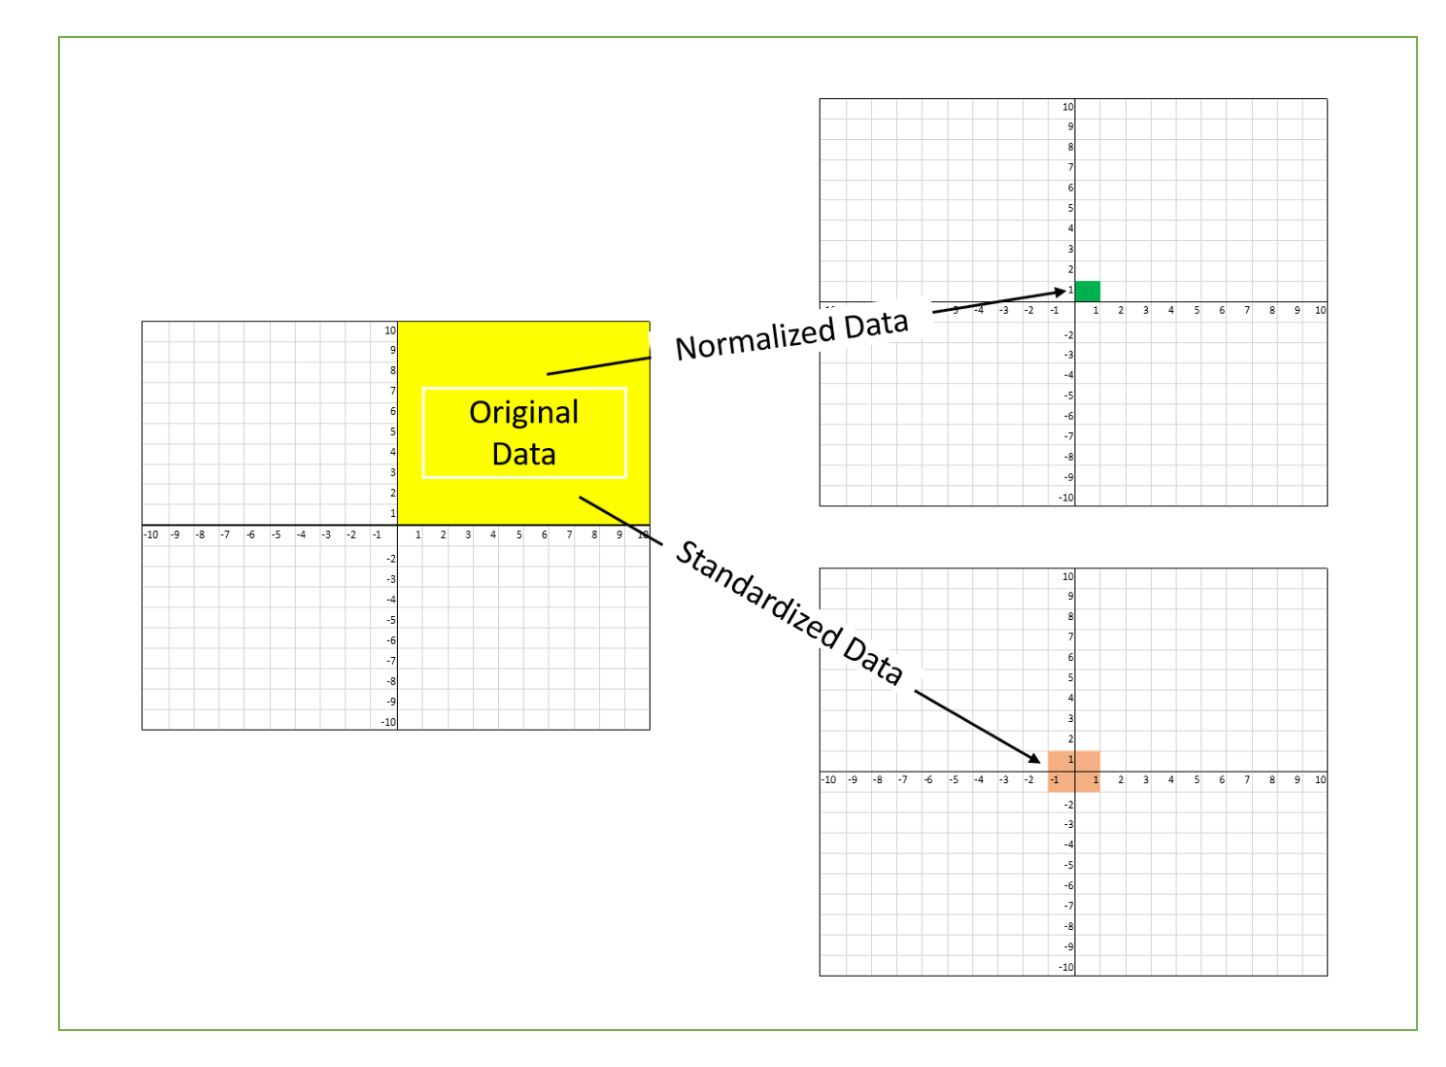

# Notice !!!! 

## MinMaxScaler is normalization libarary

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
# scale the range between 0 and 1 
scaled_data = scaler.fit_transform(df[top_5_features])

model = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs',max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
    
}

cv = KFold(n_splits=5,random_state=2019)

for name, model in model.items():
    scores = cross_val_score(model,scaled_data,df.diagnosis,cv=cv)
    
    print('%s:%.2f%%' % (name,np.mean(scores)*100))

#### Observaion 

> This result is mostly better than without normalization 

## Filtering features mean 

> Now explore a little bit more about features_mean.I will try to find the variable which can be use for classify.So lets plot a scatter plot for identify those variable who have a separable boundary between two class of cancer

In [ ]:
# First we will have a new table which contains only feature mean 
features_mean = list(df.columns[1:11])

# And then change diagnosis name
df['diagnosis']=df['diagnosis'].map({'M':0,'B':1})

In [ ]:
from pandas.plotting import scatter_matrix

color_function = {0: "blue", 1: "red"} 
colors = df["diagnosis"].map(lambda x: color_function.get(x))
# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(df[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); 
# plotting scatter plot matrix

Observation

>  1. Radius, area and perimeter have a strong linear relationship as expected and the features like as **texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean** can't be used for classify two category because both category are mixed there is no separable plane

> 2. So we can build a new prediction features without **texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean** 

## Prediction with new variables

In [ ]:
df_new = pd.DataFrame(df,columns=['diagnosis','radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concavity_mean'] )
train,test = train_test_split(df_new,test_size=0.2,random_state=2019)

x_train = train.drop(['diagnosis'],axis=1)
y_train = train.diagnosis

x_test = test.drop(['diagnosis'],axis=1)
y_test = test.diagnosis 


In [ ]:
model = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs',max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
    
}

cv = KFold(n_splits=5,random_state=2019)

prediction_var=['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concavity_mean']
df_new[prediction_var]

for name, model in model.items():
    scores = cross_val_score(model,df_new[prediction_var],df_new.diagnosis,cv=cv)    
    print('%s:%.2f%%' % (name,np.mean(scores)*100))


> These are not a better result than normalization

## Conclusion

So in the end we will compare all results that we did before

(SVM / DecisionTreeClassifier / KNeighborClassifier / LogisticRegression / RandomForestClassifier)

1. Prediction with all features 
> 91.23% / 89.47% / 92.48% / 94.74% / 93.86%

2. Prediction with top 5 features according to computation of the importance
> 90.34% / 91.21% / 88.40% / 90.69% / 92.97% 

3. Normalization with top 5 features according to computation of the importance
> 93.85% / 91.21% / 93.15% / 93.85% / 92.97%

4. Filtering the data with strong linear relationship 
> 87.71% / 89.28% / 86.82% / 89.64% / 91.92%


So third result(Normalization) had 3 best cross validation scores from 5 differrent prediciton-methods 